In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import linregress

ModuleNotFoundError: No module named 'statsmodels'

This is our Discovery work.

In [3]:
# combine all the data/usda_* into one dataframe
usda = pd.concat([pd.read_csv(f'data/usda_data_{year}.csv')  for year in range(1950, 2024)])

# combine all the data/weather_* into one dataframe
weather = pd.concat([pd.read_csv(f'data/weather_data_{year}.csv') for year in range(2000, 2021)])


In [4]:
usda.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5114 entries, 0 to 57
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   class_desc             5114 non-null   object 
 1   state_alpha            5114 non-null   object 
 2   country_code           5114 non-null   int64  
 3   commodity_desc         5114 non-null   object 
 4   country_name           5114 non-null   object 
 5   short_desc             5114 non-null   object 
 6   freq_desc              5114 non-null   object 
 7   watershed_code         5114 non-null   int64  
 8   watershed_desc         0 non-null      float64
 9   year                   5114 non-null   int64  
 10  load_time              5114 non-null   object 
 11  begin_code             5114 non-null   int64  
 12  sector_desc            5114 non-null   object 
 13  CV (%)                 237 non-null    float64
 14  statisticcat_desc      5114 non-null   object 
 15  asd_code   

In [ ]:
weather.info()

In [ ]:
# what is the average value in udsa data for each year
usda.groupby('year')['Value'].mean()


In [ ]:
# what is the average value in udsa data for each year
usda.groupby('year')['Value'].sum()

Selecting the columns needed for analysis (year, county_name, county_ansi and Value).

In [7]:
usda['year'] = pd.to_datetime(usda['year'],
               format='%Y')
usda_subset = usda[['year','county_name','county_ansi','Value']]

In [8]:
usda_subset['county_name'].nunique() #85 Michigan has 83

85

The result is that the data set has 85 and Michigan only has 83. The additional two are 'OTHER COUNTIES' and 'OTHER (COMBINED) COUNTIES'.
what do the entries look like for 'OTHER (COMBINED) COUNTIES'?

In [ ]:
usda_subset_other_combined = usda_subset[usda_subset['county_name'] == 'OTHER (COMBINED) COUNTIES']
usda_subset_other_combined

There are 144 records that contain 'OTHER (COMBINED) COUNTIES' and three entries for 1960 and several entries for 2019. It appears that perhaps the "Other Counties" was a dumping ground for smaller quanities collected over several counties.

The 3 entries for 1960 have the following asd_desc: "UPPER PENINSULA", "NORTHWEST", and "NORTHEAST". The location_desc has these entries: "MICHIGAN, UPPER PENINSULA, OTHER (COMBINED) COUNTIES", "MICHIGAN, NORTHWEST, OTHER (COMBINED) COUNTIES", and "MICHIGAN, NORTHEAST, OTHER (COMBINED) COUNTIES". How many bushels/acre were reported total?

In [10]:
pd.set_option("display.max_columns", None)
usda_subset_1960 = usda[(usda['year'] == '1960-01-01') & usda['county_name'].str.upper().str.contains('OTHER')]
usda_subset_1960

,class_desc,state_alpha,country_code,commodity_desc,country_name,short_desc,freq_desc,watershed_code,watershed_desc,year,load_time,begin_code,sector_desc,CV (%),statisticcat_desc,asd_code,end_code,county_ansi,prodn_practice_desc,group_desc,agg_level_desc,county_name,Value,week_ending,unit_desc,domaincat_desc,reference_period_desc,congr_district_code,region_desc,asd_desc,source_desc,util_practice_desc,zip_5,state_ansi,domain_desc,county_code,location_desc,state_fips_code,state_name
0,ALL CLASSES,MI,9000,CORN,UNITED STATES,"CORN, GRAIN - YIELD, MEASURED IN BU / ACRE",ANNUAL,0,NaN,1960-01-01,2012-01-01 00:00:00.000,0,CROPS,NaN,YIELD,10,0,NaN,ALL PRODUCTION PRACTICES,FIELD CROPS,COUNTY,OTHER (COMBINED) COUNTIES,46.7,NaN,BU / ACRE,NOT SPECIFIED,YEAR,NaN,NaN,UPPER PENINSULA,SURVEY,GRAIN,NaN,26,TOTAL,998,"MICHIGAN, UPPER PENINSULA, OTHER (COMBINED) CO...",26,MICHIGAN
1,ALL CLASSES,MI,9000,CORN,UNITED STATES,"CORN, GRAIN - YIELD, MEASURED IN BU / ACRE",ANNUAL,0,NaN,1960-01-01,2012-01-01 00:00:00.000,0,CROPS,NaN,YIELD,20,0,NaN,ALL PRODUCTION PRACTICES,FIELD CROPS,COUNTY,OTHER (COMBINED) COUNTIES,41.0,NaN,BU / ACRE,NOT SPECIFIED,YEAR,NaN,NaN,NORTHWEST,SURVEY,GRAIN,NaN,26,TOTAL,998,"MICHIGAN, NORTHWEST, OTHER (COMBINED) COUNTIES",26,MICHIGAN
4,ALL CLASSES,MI,9000,CORN,UNITED STATES,"CORN, GRAIN - YIELD, MEASURED IN BU / ACRE",ANNUAL,0,NaN,1960-01-01,2012-01-01 00:00:00.000,0,CROPS,NaN,YIELD,30,0,NaN,ALL PRODUCTION PRACTICES,FIELD CROPS,COUNTY,OTHER (COMBINED) COUNTIES,42.9,NaN,BU / ACRE,NOT SPECIFIED,YEAR,NaN,NaN,NORTHEAST,SURVEY,GRAIN,NaN,26,TOTAL,998,"MICHIGAN, NORTHEAST, OTHER (COMBINED) COUNTIES",26,MICHIGAN


In [11]:
usda_subset_1960.groupby('county_name')['Value'].sum().reset_index()

,county_name,Value
0,OTHER (COMBINED) COUNTIES,130.6


The total Value for 1960 "OTHER (COMBINED) COUNTIES" was 130.6
A similiar dumping ground value when compared to the single "OTHER COUNTIES" in 2020.

2019 seemed to have a lot of entries for "OTHER (COMBINED) COUNTIES". What is going on?

In [12]:
usda_2019 = usda[(usda['year'] == '2019-01-01') & (usda['county_name'] == 'OTHER (COMBINED) COUNTIES')]
usda_2019

,class_desc,state_alpha,country_code,commodity_desc,country_name,short_desc,freq_desc,watershed_code,watershed_desc,year,load_time,begin_code,sector_desc,CV (%),statisticcat_desc,asd_code,end_code,county_ansi,prodn_practice_desc,group_desc,agg_level_desc,county_name,Value,week_ending,unit_desc,domaincat_desc,reference_period_desc,congr_district_code,region_desc,asd_desc,source_desc,util_practice_desc,zip_5,state_ansi,domain_desc,county_code,location_desc,state_fips_code,state_name
0,ALL CLASSES,MI,9000,CORN,UNITED STATES,"CORN, GRAIN - YIELD, MEASURED IN BU / ACRE",ANNUAL,0,NaN,2019-01-01,2024-02-23 15:00:00.000,0,CROPS,NaN,YIELD,10,0,NaN,ALL PRODUCTION PRACTICES,FIELD CROPS,COUNTY,OTHER (COMBINED) COUNTIES,117.9,NaN,BU / ACRE,NOT SPECIFIED,YEAR,NaN,NaN,UPPER PENINSULA,SURVEY,GRAIN,NaN,26,TOTAL,998,"MICHIGAN, UPPER PENINSULA, OTHER (COMBINED) CO...",26,MICHIGAN
3,ALL CLASSES,MI,9000,CORN,UNITED STATES,"CORN, GRAIN - YIELD, MEASURED IN BU / ACRE",ANNUAL,0,NaN,2019-01-01,2024-02-23 15:00:00.000,0,CROPS,NaN,YIELD,20,0,NaN,ALL PRODUCTION PRACTICES,FIELD CROPS,COUNTY,OTHER (COMBINED) COUNTIES,116.1,NaN,BU / ACRE,NOT SPECIFIED,YEAR,NaN,NaN,NORTHWEST,SURVEY,GRAIN,NaN,26,TOTAL,998,"MICHIGAN, NORTHWEST, OTHER (COMBINED) COUNTIES",26,MICHIGAN
10,ALL CLASSES,MI,9000,CORN,UNITED STATES,"CORN, GRAIN - YIELD, MEASURED IN BU / ACRE",ANNUAL,0,NaN,2019-01-01,2024-02-23 15:00:00.000,0,CROPS,NaN,YIELD,30,0,NaN,ALL PRODUCTION PRACTICES,FIELD CROPS,COUNTY,OTHER (COMBINED) COUNTIES,110.3,NaN,BU / ACRE,NOT SPECIFIED,YEAR,NaN,NaN,NORTHEAST,SURVEY,GRAIN,NaN,26,TOTAL,998,"MICHIGAN, NORTHEAST, OTHER (COMBINED) COUNTIES",26,MICHIGAN
17,ALL CLASSES,MI,9000,CORN,UNITED STATES,"CORN, GRAIN - YIELD, MEASURED IN BU / ACRE",ANNUAL,0,NaN,2019-01-01,2024-02-23 15:00:00.000,0,CROPS,NaN,YIELD,40,0,NaN,ALL PRODUCTION PRACTICES,FIELD CROPS,COUNTY,OTHER (COMBINED) COUNTIES,137.1,NaN,BU / ACRE,NOT SPECIFIED,YEAR,NaN,NaN,WEST CENTRAL,SURVEY,GRAIN,NaN,26,TOTAL,998,"MICHIGAN, WEST CENTRAL, OTHER (COMBINED) COUNTIES",26,MICHIGAN
21,ALL CLASSES,MI,9000,CORN,UNITED STATES,"CORN, GRAIN - YIELD, MEASURED IN BU / ACRE",ANNUAL,0,NaN,2019-01-01,2024-02-23 15:00:00.000,0,CROPS,NaN,YIELD,50,0,NaN,ALL PRODUCTION PRACTICES,FIELD CROPS,COUNTY,OTHER (COMBINED) COUNTIES,143.2,NaN,BU / ACRE,NOT SPECIFIED,YEAR,NaN,NaN,CENTRAL,SURVEY,GRAIN,NaN,26,TOTAL,998,"MICHIGAN, CENTRAL, OTHER (COMBINED) COUNTIES",26,MICHIGAN
31,ALL CLASSES,MI,9000,CORN,UNITED STATES,"CORN, GRAIN - YIELD, MEASURED IN BU / ACRE",ANNUAL,0,NaN,2019-01-01,2024-02-23 15:00:00.000,0,CROPS,NaN,YIELD,70,0,NaN,ALL PRODUCTION PRACTICES,FIELD CROPS,COUNTY,OTHER (COMBINED) COUNTIES,140.4,NaN,BU / ACRE,NOT SPECIFIED,YEAR,NaN,NaN,SOUTHWEST,SURVEY,GRAIN,NaN,26,TOTAL,998,"MICHIGAN, SOUTHWEST, OTHER (COMBINED) COUNTIES",26,MICHIGAN
36,ALL CLASSES,MI,9000,CORN,UNITED STATES,"CORN, GRAIN - YIELD, MEASURED IN BU / ACRE",ANNUAL,0,NaN,2019-01-01,2024-02-23 15:00:00.000,0,CROPS,NaN,YIELD,80,0,NaN,ALL PRODUCTION PRACTICES,FIELD CROPS,COUNTY,OTHER (COMBINED) COUNTIES,121.3,NaN,BU / ACRE,NOT SPECIFIED,YEAR,NaN,NaN,SOUTH CENTRAL,SURVEY,GRAIN,NaN,26,TOTAL,998,"MICHIGAN, SOUTH CENTRAL, OTHER (COMBINED) COUN...",26,MICHIGAN


The 7 entries for 2019 have the following asd_desc: "UPPER PENINSULA", "NORTHWEST", "NORTHEAST","WEST CENTRAL", "CENTRAL", "SOUTHWEST", and "SOUTH CENTRAL". The location_desc has these entries: "MICHIGAN, UPPER PENINSULA, OTHER (COMBINED) COUNTIES", "MICHIGAN, NORTHWEST, OTHER (COMBINED) COUNTIES", "MICHIGAN, NORTHEAST, OTHER (COMBINED) COUNTIES","MICHIGAN, WEST CENTRAL, OTHER (COMBINED) COUNTIES", "MICHIGAN, CENTRAL, OTHER (COMBINED) COUNTIES", "MICHIGAN, SOUTHWEST, OTHER (COMBINED) COUNTIES", and "MICHIGAN, SOUTH CENTRAL, OTHER (COMBINED) COUNTIES".

How many years and how many entries are we looking at that are like this? It looks like 2019 was the worst with 7 regions identified. The amount of bushels/acre is  886.3. This is considerably more than 1960.

In [13]:
grouped_df = usda.groupby(['year', 'county_name']).agg(
    count=('county_name', 'count'),
    sum=('Value', 'sum')
).reset_index()

filtered_df = grouped_df[grouped_df['count'] > 1]
# Sort by 'sum' in descending order
filtered_df = filtered_df.sort_values(by='sum', ascending=False)

print(filtered_df)

           year                county_name  count    sum
4768 2019-01-01  OTHER (COMBINED) COUNTIES      7  886.3
4610 2016-01-01  OTHER (COMBINED) COUNTIES      6  824.1
4551 2015-01-01  OTHER (COMBINED) COUNTIES      6  823.4
4670 2017-01-01  OTHER (COMBINED) COUNTIES      5  655.8
3942 2005-01-01  OTHER (COMBINED) COUNTIES      5  576.0
3638 2000-01-01  OTHER (COMBINED) COUNTIES      6  565.0
4001 2006-01-01  OTHER (COMBINED) COUNTIES      5  555.0
3589 1999-01-01  OTHER (COMBINED) COUNTIES      5  533.0
4061 2007-01-01  OTHER (COMBINED) COUNTIES      6  502.0
3881 2004-01-01  OTHER (COMBINED) COUNTIES      5  453.0
4120 2008-01-01  OTHER (COMBINED) COUNTIES      5  442.0
4493 2014-01-01  OTHER (COMBINED) COUNTIES      4  436.4
3820 2003-01-01  OTHER (COMBINED) COUNTIES      4  398.0
4717 2018-01-01  OTHER (COMBINED) COUNTIES      3  397.1
4248 2010-01-01  OTHER (COMBINED) COUNTIES      3  385.7
3464 1997-01-01  OTHER (COMBINED) COUNTIES      4  345.0
3691 2001-01-01  OTHER (COMBINE

When comparing to the rest of the entries in 2019. How bad does it look?

In [15]:
usda_subset_2019=usda_subset[usda_subset['year'] == '2019-01-01']
grouped_df_2019 = usda_subset_2019.groupby(['year', 'county_name']).agg(
    count=('county_name', 'count'),
    sum=('Value', 'sum')
).reset_index()

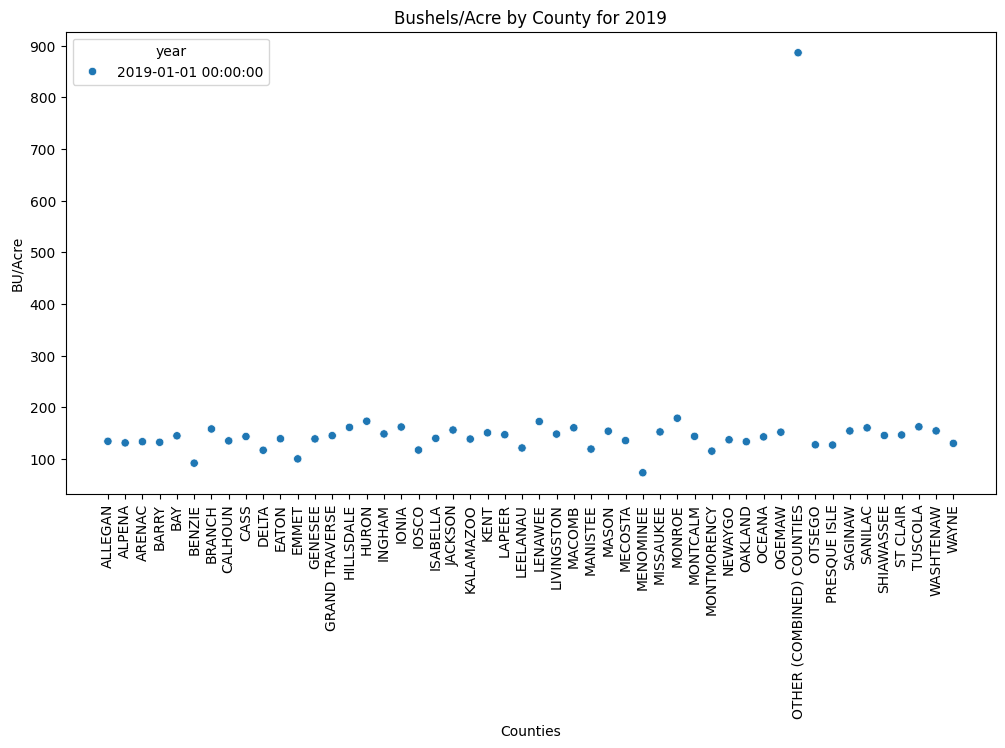

In [16]:
# Adjust figure size for better readability
plt.figure(figsize=(12, 6))

# Create the scatter plot
g = sns.scatterplot(data=grouped_df_2019, x="county_name", y="sum", hue="year")

# Rotate the x-axis labels for readability
plt.xticks(rotation=90)

# Add labels and title
plt.xlabel('Counties')
plt.ylabel('BU/Acre')
plt.title('Bushels/Acre by County for 2019')

# Adjust the legend positioning
#g.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)

# Display the plot
plt.show()

The rest of the counties for 2019 produced no more than 200 bushels/acre. As expected, "OTHER (COMBINED) COUNTIES" is the highest in the chart. What about those single entries for 'OTHER COUNTIES' after 2020?

In [19]:
usda_subset_other = usda_subset[usda_subset['county_name'] == 'OTHER COUNTIES']
usda_subset_other

,year,county_name,county_ansi,Value
60,2020-01-01,OTHER COUNTIES,NaN,151.0
57,2021-01-01,OTHER COUNTIES,NaN,150.2
59,2022-01-01,OTHER COUNTIES,NaN,163.2
57,2023-01-01,OTHER COUNTIES,NaN,166.3


There are 4 records (years) that contain 'OTHER COUNTIES'; no duplicated years. We will go back to the original dataset and look at the entire record for those years.

In [ ]:
pd.set_option("display.max_columns", None)
usda_other = usda[usda['county_name'] == 'OTHER COUNTIES']
usda_other

The asd_desc and location_desc is null for all 4 records is "MICHIGAN, OTHER COUNTIES".

We will take a look and see how many total counties are reporting beyond 2020.

In [23]:
# Filter the DataFrame for the year >= 2020
usda_subset = usda[usda['year'] >= '2020']

# Count the number of unique county names by year
unique_counties_by_year = usda_subset.groupby('year')['county_name'].nunique()
unique_counties_by_year

year
2020-01-01    61
2021-01-01    58
2022-01-01    60
2023-01-01    58
Name: county_name, dtype: int64

There are 61 counties in the data set for 2020. And those unique counties are:

In [17]:
# Filter the DataFrame for the year >= 2020
usda_subset_2020 = usda_subset[usda_subset['year'] == '2020']
usda_subset_2020['county_name'].unique()

array(['DELTA', 'DICKINSON', 'MENOMINEE', 'ANTRIM', 'BENZIE',
       'CHARLEVOIX', 'EMMET', 'GRAND TRAVERSE', 'LEELANAU', 'MANISTEE',
       'WEXFORD', 'ALCONA', 'ALPENA', 'IOSCO', 'OGEMAW', 'OTSEGO',
       'PRESQUE ISLE', 'MASON', 'MUSKEGON', 'NEWAYGO', 'OCEANA',
       'GLADWIN', 'ISABELLA', 'MECOSTA', 'MIDLAND', 'MONTCALM', 'ARENAC',
       'BAY', 'HURON', 'SAGINAW', 'SANILAC', 'TUSCOLA', 'ALLEGAN',
       'BERRIEN', 'CASS', 'KALAMAZOO', 'KENT', 'OTTAWA', 'VAN BUREN',
       'BARRY', 'BRANCH', 'CALHOUN', 'CLINTON', 'EATON', 'HILLSDALE',
       'INGHAM', 'IONIA', 'JACKSON', 'ST JOSEPH', 'SHIAWASSEE', 'GENESEE',
       'LAPEER', 'LENAWEE', 'LIVINGSTON', 'MACOMB', 'MONROE', 'OAKLAND',
       'ST CLAIR', 'WASHTENAW', 'WAYNE', 'OTHER COUNTIES'], dtype=object)

array(['DELTA', 'DICKINSON', 'MENOMINEE', 'ANTRIM', 'BENZIE',
       'CHARLEVOIX', 'EMMET', 'GRAND TRAVERSE', 'LEELANAU', 'MANISTEE',
       'WEXFORD', 'ALCONA', 'ALPENA', 'IOSCO', 'OGEMAW', 'OTSEGO',
       'PRESQUE ISLE', 'MASON', 'MUSKEGON', 'NEWAYGO', 'OCEANA',
       'GLADWIN', 'ISABELLA', 'MECOSTA', 'MIDLAND', 'MONTCALM', 'ARENAC',
       'BAY', 'HURON', 'SAGINAW', 'SANILAC', 'TUSCOLA', 'ALLEGAN',
       'BERRIEN', 'CASS', 'KALAMAZOO', 'KENT', 'OTTAWA', 'VAN BUREN',
       'BARRY', 'BRANCH', 'CALHOUN', 'CLINTON', 'EATON', 'HILLSDALE',
       'INGHAM', 'IONIA', 'JACKSON', 'ST JOSEPH', 'SHIAWASSEE', 'GENESEE',
       'LAPEER', 'LENAWEE', 'LIVINGSTON', 'MACOMB', 'MONROE', 'OAKLAND',
       'ST CLAIR', 'WASHTENAW', 'WAYNE', 'OTHER COUNTIES'], dtype=object)

In [24]:
# what is the average value in udsa data for each of those years
mean_value = usda_subset.groupby('year')['Value'].mean()

# create other Dataframe from orignial data
usda_other = usda[usda['county_name'] == 'OTHER COUNTIES']
usda_other

# Merge the two DataFrames for comparison
comparison = pd.merge(mean_value, usda_other, on='year', how='outer')

# Rename columns for clarity
comparison.rename(columns={'Value_x': 'Yearly Mean', 'Value_y':'Value'}, inplace=True)

# Calculate the difference
comparison['Difference'] = comparison['Yearly Mean'] - comparison['Value']
comparison[['year','Yearly Mean', 'Value', 'Difference']]

,year,Yearly Mean,Value,Difference
0,2020-01-01,143.606557,151.0,-7.393443
1,2021-01-01,164.943103,150.2,14.743103
2,2022-01-01,151.955000,163.2,-11.245000
3,2023-01-01,158.160345,166.3,-8.139655


The difference is no greater than 14.7 bushels per acre. This is not significant when compared to the mean for each year.

Now let's do the same for the "OTHER (COMBINED)" years. They stopped using that in 2019.

In [26]:
# Filter the DataFrame for the year <= 2019
usda_subset_other_combined = usda[usda['year'] <= '2019']

# what is the average value in udsa data for each of those years
mean_value = usda_subset_other_combined.groupby('year')['Value'].mean()

# Filter for counties where 'county_name' contains 'OTHER (COMBINED)' (case insensitive)
other_combined = usda_subset_other_combined[usda_subset_other_combined['county_name'].str.contains('OTHER \(COMBINED\)', case=False, regex=True)]

# Sum the 'Value' for OTHER (COMBINED) COUNTIES
other_combined_sum = other_combined.groupby('year')['Value'].sum().reset_index('year')

# Merge the two DataFrames for comparison and drop the records where there weren't "Other (Combined)" Counties
comparison = pd.merge(mean_value, other_combined_sum, on='year', how='outer').dropna()

# Rename columns for clarity
comparison.rename(columns={'Value_x': 'Yearly Mean', 'Value_y':'Other Total Value'}, inplace=True)

# Calculate the difference
comparison['Difference'] = comparison['Yearly Mean'] - comparison['Other Total Value']
comparison[['year','Yearly Mean', 'Other Total Value', 'Difference']]

,year,Yearly Mean,Other Total Value,Difference
8,1958-01-01,43.529114,9.0,34.529114
10,1960-01-01,50.548148,130.6,-80.051852
11,1961-01-01,60.153704,139.2,-79.046296
12,1962-01-01,58.377778,144.8,-86.422222
13,1963-01-01,60.896296,142.2,-81.303704
15,1965-01-01,56.075926,159.3,-103.224074
16,1966-01-01,63.718519,152.5,-88.781481
17,1967-01-01,65.866667,172.8,-106.933333
18,1968-01-01,73.649254,65.7,7.949254
19,1969-01-01,73.392537,58.0,15.392537


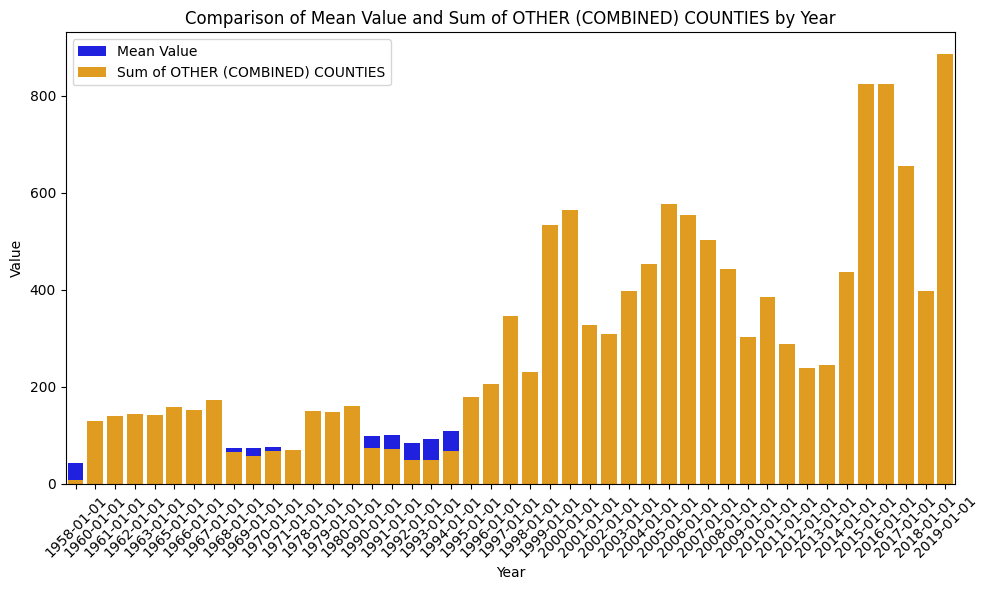

In [27]:
# Plotting
plt.figure(figsize=(10, 6))

# Plot mean values
sns.barplot(x='year', y='Yearly Mean', data=comparison, color='blue', label='Mean Value')

# Plot summed values for OTHER (COMBINED) COUNTIES
sns.barplot(x='year', y='Other Total Value', data=comparison, color='orange', label='Sum of OTHER (COMBINED) COUNTIES')

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Comparison of Mean Value and Sum of OTHER (COMBINED) COUNTIES by Year')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
sns.histplot(data=usda_subset, x="Value", hue="county_name", legend=False)
plt.xlabel('BU/Acre')
plt.title('Bushels/Acre by County for Past 2 Decades')
plt.show()

In [5]:
def clean_usda(usda_df, start_year, end_year, other='Yes'):
    # We will focus the fields from the dataframe we are interested in
    usda_df = usda_df[['year','county_name','county_ansi','Value']]

    # We will change the datatype of year to datetime because it fits the data and we can have access to date functions
    usda_df['year'] = pd.to_datetime(usda_df['year'],
               format='%Y')
    
    # We need to ensure the start_year is a year too.
    start_year = pd.to_datetime(str(start_year), format='%Y')

    if end_year is not None:
        end_year = pd.to_datetime(str(end_year), format='%Y')
    else: end_year = start_year

    # Filter starting from the requested year
    usda_df = usda_df[(usda_df['year'] >= start_year) & (usda_df['year'] <= end_year)]
   
    # Remove the "Other" type county entries. We convert to all caps to handle any inconsistencies
    if other == 'Yes':
        usda_df = usda_df[~usda_df['county_name'].str.upper().str.contains('OTHER')]
    
    return usda_df

The rest of the counties for 2019 produced no more than 200 bushels/acre. As expected, "OTHER (COMBINED) COUNTIES" is the highest in the chart.

In [25]:
# GDD calculation function
def calculate_gdd(df, base_temp=50, upper_temp=86):
    """
    Calculate Growing Degree Days (GDD) for corn.
    """
    df['TMAX'] = df['TMAX'].clip(lower=base_temp, upper=upper_temp)
    df['TMIN'] = df['TMIN'].clip(lower=base_temp)
    df['TAVG'] = (df['TMAX'] + df['TMIN']) / 2
    df['GDD'] = df['TAVG'] - base_temp
    return df

In [26]:
weather = calculate_gdd(weather)

In [ ]:
# Compare average yield for usda_data_1955 and usda_data_2015
usda_1955 = pd.read_csv('data/usda_data_1955.csv')
usda_2015 = pd.read_csv('data/usda_data_2015.csv')

usda_1955['Value'].mean(), usda_2015['Value'].mean()

# whats the std deviation of yield for those years
usda_1955['Value'].std(), usda_2015['Value'].std()


In [ ]:
# Compare total gdd for weather_data_1955 and weather_data_2015 for county_ansi=161
weather_2014 = pd.read_csv('data/weather_data_2014.csv')
weather_2023 = pd.read_csv('data/weather_data_2023.csv')

weather_2014 = calculate_gdd(weather_2014)
weather_2023 = calculate_gdd(weather_2023)

weather_2014[weather_2014['county_ansi'] == 161]['GDD'].sum(), weather_2023[weather_2023['county_ansi'] == 161]['GDD'].sum()

# Do this for all years between 1950 and 1959
gdd = []
for year in range(1950, 1960):
    weather = pd.read_csv(f'data/weather_data_{year}.csv')
    weather = calculate_gdd(weather)
    gdd.append(weather[weather['county_ansi'] == 161]['GDD'].sum())

gdd


In [ ]:
# Combine all weather data into a single DataFrame
weather_data = pd.concat([pd.read_csv(f'data/weather_data_{year}.csv') for year in range(1990, 2024)])
# Calculate GDD for each day
weather_data = calculate_gdd(weather_data)
weather_data


For the analysis, a function is created that we can send a usda dataframe, provide the start and end dates, and determine whether or not we want to include "other counties". I will focus on year, county_name, county_ansi, and Value.

In [ ]:
# Convert 'date' to datetime if it's not already
weather_data['date'] = pd.to_datetime(weather_data['date'])

# Extract year and month
weather_data['year'] = weather_data['date'].dt.year
weather_data['month'] = weather_data['date'].dt.month

# Aggregate GDD by county and year
gdd_annual = weather_data.groupby(['state_ansi', 'county_ansi', 'year'])['GDD'].sum().reset_index()
gdd_annual


In [31]:
# Combine all USDA data into a single DataFrame usda_data
usda_data = pd.concat([pd.read_csv(f'data/usda_data_{year}.csv') for year in range(1990, 2024)])

In [32]:
# I added some lines to clean the data, most files are fine but I am looking for the 'YIELD' data and skipping any suppressed data

# Filter for the relevant data (e.g., 'YIELD' in 'statisticcat_desc')
corn_data = usda_data[usda_data['statisticcat_desc'] == 'YIELD']

# Convert 'Value' to numeric, removing any commas or missing values
corn_data['Value'] = corn_data['Value'].replace(',', '', regex=True)
corn_data = corn_data[corn_data['Value'] != '(D)']  # Remove suppressed data
corn_data['Value'] = pd.to_numeric(corn_data['Value'])

# Select relevant columns
corn_data = corn_data[['state_ansi', 'county_ansi', 'year', 'Value', 'county_name']]


In [33]:
# Merge the GDD and corn yield data to make a single DataFrame

# Merge on 'state_ansi', 'county_ansi', and 'year'
merged_data = pd.merge(gdd_annual, corn_data, on=['state_ansi', 'county_ansi', 'year'])
# Remove entries with zero or NaN yields
merged_data = merged_data[merged_data['Value'] > 0]
# Remove entries with zero or NaN yields
merged_data = merged_data[merged_data['GDD'] > 0]



In [34]:
# Dump merged_data to csv to test
#merged_data.to_csv('merged_data.csv', index=False)

In [ ]:
merged_data['Value'].describe()

In [ ]:
merged_data['GDD'].describe()

**Visualize Data Distribution**
-------------------------------
Plot boxplots to visualize the distribution of GDD and corn yield.

In [ ]:
# Plot for 'GDD'
plt.figure(figsize=(7, 7))
plt.boxplot(merged_data['GDD'], tick_labels=['']) 
plt.title('Corn Growing Degree Days (GDD)', fontsize=14)
plt.ylabel('GDD', fontsize=12)
plt.xlabel('Corn Growing Degree Days (GDD)', fontsize=12)
plt.grid(True)

# Plot for 'Value'
plt.figure(figsize=(7, 7))
plt.boxplot(merged_data['Value'], tick_labels=[''])
plt.title('Corn Yield', fontsize=14)
plt.ylabel('Corn Yield', fontsize=12)
plt.xlabel('Corn Yield', fontsize=12)
plt.grid(True)

plt.show()


**Remove Outliers**
-------------------
Identify and remove outliers using the Interquartile Range (IQR) method.

In [38]:
# Calculate IQR for 'GDD' and 'Value' columns to identify outliers
Q1_GDD = merged_data['GDD'].quantile(0.25)
Q3_GDD = merged_data['GDD'].quantile(0.75)
IQR_GDD = Q3_GDD - Q1_GDD

Q1_Value = merged_data['Value'].quantile(0.25)
Q3_Value = merged_data['Value'].quantile(0.75)
IQR_Value = Q3_Value - Q1_Value

# Define bounds for outliers in 'GDD' and 'Value'
lower_bound_GDD = Q1_GDD - 1.5 * IQR_GDD
upper_bound_GDD = Q3_GDD + 1.5 * IQR_GDD

lower_bound_Value = Q1_Value - 1.5 * IQR_Value
upper_bound_Value = Q3_Value + 1.5 * IQR_Value

# Filter out the outliers
merged_data = merged_data[
    (merged_data['GDD'] >= lower_bound_GDD) & (merged_data['GDD'] <= upper_bound_GDD) &
    (merged_data['Value'] >= lower_bound_Value) & (merged_data['Value'] <= upper_bound_Value)
]



**Re-examine the Data**
-----------------------
Check the statistical summary after removing outliers.

In [ ]:
merged_data['Value'].describe()

In [ ]:
merged_data['GDD'].describe()

In [41]:
# Dump merged_data to csv to test
merged_data.to_csv('merged_data.csv', index=False)

**Visualize Correlation Between GDD and Corn Yield**
----------------------------------------------------
Create a scatter plot to visualize the correlation, with a color gradient showing time progression.

In [ ]:
# Create a scatter plot with color gradient for time progression
plt.figure(figsize=(10, 6))

# Scatter plot with color mapped to 'year' and a plasma colormap for better color representation
scatter = plt.scatter(x=merged_data['GDD'], y=merged_data['Value'], c=merged_data['year'], cmap='plasma', s=10)

# Add colorbar to show year progression
cbar = plt.colorbar(scatter)
cbar.set_label('Year')

# Set titles and labels
plt.title('Correlation between GDD and Corn Yield with Time Progression', fontsize=14)
plt.xlabel('Growing Degree Days (GDD)', fontsize=12)
plt.ylabel('Corn Yield (bu/acre)', fontsize=12)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
# Scatter plot of GDD vs. corn yield
sns.lmplot(x='GDD', y='Value', data=merged_data, scatter_kws={'s': 1})
plt.title('Correlation between GDD and Corn Yield')
plt.xlabel('Growing Degree Days (GDD)')
plt.ylabel('Corn Yield (bu/acre)')
plt.show()

**Analyze Precipitation Data**
------------------------------
We will analyze the correlation between total precipitation (PRCP) and corn yield.

In [ ]:
# Make the same chart with PRCP instead of GDD

# Calculate total precipitation for the growing season
weather_data['PRCP'] = weather_data['PRCP'].clip(lower=0)
prcp_annual = weather_data.groupby(['state_ansi', 'county_ansi', 'year'])['PRCP'].sum().reset_index()

# Merge on 'state_ansi', 'county_ansi', and 'year'
merged_data_prcp = pd.merge(prcp_annual, corn_data, on=['state_ansi', 'county_ansi', 'year'])
# Remove entries with zero or NaN yields
merged_data_prcp = merged_data_prcp[merged_data_prcp['Value'] > 0]
# Remove entries with zero or NaN yields
merged_data_prcp = merged_data_prcp[merged_data_prcp['PRCP'] > 0]

# Scatter plot with regression line
sns.lmplot(x='PRCP', y='Value', data=merged_data_prcp, scatter_kws={'s': 0.5})
plt.title('Correlation between PRCP and Corn Yield')
plt.xlabel('Total Precipitation (mm)')
plt.ylabel('Corn Yield (bu/acre)')
plt.show()


Given the data was similar to the GDD data, we dind't feel it was necessary to include the analysis of the precipitation data.

In [45]:
# Add precipitation data to the merged dataframe
#prcp_annual = weather_data.groupby(['state_ansi', 'county_ansi', 'year'])['PRCP'].sum().reset_index()
#merged_data = pd.merge(merged_data, prcp_annual, on=['state_ansi', 'county_ansi', 'year'])


**Perform Linear Regression Analysis**
--------------------------------------
We will perform an Ordinary Least Squares (OLS) regression to quantify the relationship between GDD and corn yield.

In [ ]:
# Step 1: Prepare the data for OLS (adding a constant for intercept)
X = sm.add_constant(merged_data['GDD'])  # Independent variable (GDD) with a constant
y = merged_data['Value']  # Dependent variable (Corn Yield)

# Step 2: Fit the OLS model
ols_model = sm.OLS(y, X).fit()

# Step 3: Print out the summary of the regression
print(ols_model.summary())

# Step 4: Plot the scatter plot with regression line (optional, already in your code)
sns.lmplot(x='GDD', y='Value', data=merged_data, scatter_kws={'s': 1})
plt.title('Correlation between GDD and Corn Yield')
plt.xlabel('Growing Degree Days (GDD)')
plt.ylabel('Corn Yield (bu/acre)')
plt.show()


**Multiple Linear Regression**
------------------------------
Include both GDD and Year as independent variables to see if time has an effect on yield.

In [ ]:
# Step 1: Prepare the data for OLS (adding a constant for intercept)
X = merged_data[['GDD', 'year']]  # Independent variables (GDD and Year)
X = sm.add_constant(X)  # Add constant for the intercept
y = merged_data['Value']  # Dependent variable (Corn Yield)

# Step 2: Fit the OLS model
ols_model = sm.OLS(y, X).fit()

# Step 3: Print out the summary of the regression
print(ols_model.summary())

# Step 4: Plot the scatter plot with regression line for GDD (optional)
sns.lmplot(x='GDD', y='Value', data=merged_data, scatter_kws={'s': 1})
plt.title('Correlation between GDD and Corn Yield')
plt.xlabel('Growing Degree Days (GDD)')
plt.ylabel('Corn Yield (bu/acre)')
plt.show()


In [ ]:
# Define independent variables and dependent variable
#X = merged_data[['GDD', 'PRCP']]
X = merged_data[['Value']]
y = merged_data['GDD']

# Add a constant term for the intercept
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()
print(model.summary())


**Ranking**
------------
We determined a ranking of the counties based on a number of factors and will use a normalized score to rank the counties. in the end.

- Highest Average Yield
- Consistency Above State Average
- Highest GDD
- Low Variability

In [ ]:
# Calculate the average yield per county over the entire period
average_yield = merged_data.groupby('county_name')['Value'].mean().reset_index()

# Sort counties by average yield in descending order
average_yield_sorted = average_yield.sort_values(by='Value', ascending=False)

# Top 10 counties
print("Top 10 Counties by Average Corn Yield:")
print(average_yield_sorted.head(10))


In [ ]:
# Horizontal bar plot of average yields for top 10 counties in reverse order
plt.figure(figsize=(5, 5))
plt.barh(average_yield_sorted['county_name'].head(10)[::-1], average_yield_sorted['Value'].head(10)[::-1], color='skyblue')
plt.ylabel('County')
plt.xlabel('Average Corn Yield (bu/acre)')
plt.title('Top 10 Counties by Average Corn Yield')
plt.tight_layout()
plt.show()


In [ ]:
# I was wondering if we pick the best based how consistent are they in beating the state average

# Calculate the state average yield for each year
state_average_yield = merged_data.groupby('year')['Value'].mean().reset_index(name='state_avg_yield')

# Merge state average back into merged_data
merged_data_with_state_avg = pd.merge(merged_data, state_average_yield, on='year')

# Create a flag for whether the county's yield is above the state average each year
merged_data_with_state_avg['above_state_avg'] = merged_data_with_state_avg['Value'] > merged_data_with_state_avg['state_avg_yield']

# Calculate the percentage of years each county was above the state average
county_performance = merged_data_with_state_avg.groupby('county_name')['above_state_avg'].mean().reset_index()

# Convert to percentage
county_performance['percent_above_state_avg'] = county_performance['above_state_avg'] * 100

# Sort counties by percentage in descending order
county_performance_sorted = county_performance.sort_values(by='percent_above_state_avg', ascending=False)

# Display the top 10 counties
print("Top 10 Counties by Consistency in Exceeding State Average Yield:")
print(county_performance_sorted.head(10))


In [ ]:
# Horizontal bar plot of top 10 counties by percentage of years above state average in reverse order
plt.figure(figsize=(5, 5))
plt.barh(county_performance_sorted['county_name'].head(10)[::-1], county_performance_sorted['percent_above_state_avg'].head(10)[::-1], color='orange')
plt.ylabel('County')
plt.xlabel('Percentage of Years Above State Average (%)')
plt.title('Top 10 Counties Consistently Exceeding State Average Yield')
plt.tight_layout()
plt.show()


In [ ]:
# What about finding the best improved county over time wiht slope

# Prepare a DataFrame to store slopes
county_slopes = []

for county in merged_data['county_name'].unique():
    county_data = merged_data[merged_data['county_name'] == county]
    if len(county_data['year'].unique()) > 1:  # Ensure there's enough data
        slope, intercept, r_value, p_value, std_err = linregress(county_data['year'], county_data['Value'])
        county_slopes.append({'county_name': county, 'slope': slope, 'p_value': p_value})
    else:
        county_slopes.append({'county_name': county, 'slope': np.nan, 'p_value': np.nan})

# Convert to DataFrame
slopes_df = pd.DataFrame(county_slopes)

# Remove counties with NaN slopes
slopes_df.dropna(subset=['slope'], inplace=True)

# Sort counties by slope
slopes_df_sorted = slopes_df.sort_values(by='slope', ascending=False)

print("Top 10 Counties by Yield Improvement Over Time:")
print(slopes_df_sorted.head(10))


In [ ]:
# Horizontal bar plot of top 10 counties by yield improvement over time (slope)
plt.figure(figsize=(5, 5))
plt.barh(slopes_df_sorted['county_name'].head(10)[::-1], slopes_df_sorted['slope'].head(10)[::-1], color='green')
plt.ylabel('County')
plt.xlabel('Slope of Yield Improvement Over Time')
plt.title('Top 10 Counties by Yield Improvement Over Time')
plt.tight_layout()
plt.show()


In [ ]:
# Lets looks at the counties that have been the most consistent in their yield over time

# Calculate standard deviation of yield per county
yield_variability = merged_data.groupby('county_name')['Value'].std().reset_index(name='yield_std')

# Sort counties by yield_std in ascending order
yield_variability_sorted = yield_variability.sort_values(by='yield_std')

print("Top 10 Counties with Least Yield Variability:")
print(yield_variability_sorted.head(10))


In [ ]:
# Horizontal bar plot of top 10 counties with least yield variability (standard deviation)
plt.figure(figsize=(5, 5))
plt.barh(yield_variability_sorted['county_name'].head(10)[::-1], yield_variability_sorted['yield_std'].head(10)[::-1], color='purple')
plt.ylabel('County')
plt.xlabel('Yield Variability (Standard Deviation)')
plt.title('Top 10 Counties with Least Yield Variability (Reversed Order)')
plt.tight_layout()
plt.show()


In [ ]:
# Lets look at the counties with the highest average gdd

# Calculate average GDD per county
avg_gdd_per_county = merged_data.groupby('county_name')['GDD'].mean().reset_index()

# Sort counties by average GDD in descending order
avg_gdd_per_county_sorted = avg_gdd_per_county.sort_values(by='GDD', ascending=False)

print("Top 10 Counties by Average Growing Degree Days:")
print(avg_gdd_per_county_sorted.head(10))


In [ ]:
# Horizontal bar plot of top 10 counties by average GDD
plt.figure(figsize=(5, 5))
plt.barh(avg_gdd_per_county_sorted['county_name'].head(10)[::-1], avg_gdd_per_county_sorted['GDD'].head(10)[::-1], color='red')
plt.ylabel('County')
plt.xlabel('Average Growing Degree Days (GDD)')
plt.title('Top 10 Counties by Average Growing Degree Days')
plt.tight_layout()
plt.show()


In [ ]:
# Use county_name to merge all the other DFs
county_metrics = average_yield[['county_name', 'Value']].merge(
    county_performance[['county_name', 'percent_above_state_avg']], on='county_name').merge(
    yield_variability[['county_name', 'yield_std']], on='county_name').merge(
    avg_gdd_per_county[['county_name', 'GDD']], on='county_name')

# Normalize the metrics
scaler = MinMaxScaler()

county_metrics[['avg_yield_norm', 'percent_above_avg_norm', 'yield_std_norm', 'avg_gdd_per_county']] = scaler.fit_transform(
    county_metrics[['Value', 'percent_above_state_avg', 'yield_std', 'GDD']])

# Invert yield_std_norm so that lower variability scores higher
county_metrics['yield_std_norm'] = 1 - county_metrics['yield_std_norm']

# I assigned weights to each metric but nothing scientific
# Should come back to this later
county_metrics['total_score'] = (
    county_metrics['avg_yield_norm'] * 0.4 +
    county_metrics['percent_above_avg_norm'] * 0.3 +
    county_metrics['yield_std_norm'] * 0.1 +
    county_metrics['avg_gdd_per_county'] * 0.1
)

# Sort counties by total_score
county_metrics_sorted = county_metrics.sort_values(by='total_score', ascending=False)

print("Top 10 Counties by Composite Score:")
print(county_metrics_sorted[['county_name', 'total_score']].head(10))


In [ ]:
# Bar plot of top 10 counties by composite score
plt.figure(figsize=(12, 6))
plt.bar(county_metrics_sorted['county_name'].head(10), county_metrics_sorted['total_score'].head(10), color='purple')
plt.xticks(rotation=45)
plt.xlabel('County')
plt.ylabel('Composite Score')
plt.title('Top 10 Counties by Composite Score')
plt.tight_layout()
plt.show()


In [ ]:
# Prepare data for heatmap
metrics_for_heatmap = county_metrics_sorted[['county_name', 'avg_yield_norm', 'percent_above_avg_norm', 'yield_std_norm', 'avg_gdd_per_county', 'total_score']].set_index('county_name')

# Rename the columns to make the metric names more readable
metrics_for_heatmap.rename(columns={
    'avg_yield_norm': 'Normalized Avg Yield',
    'percent_above_avg_norm': 'Percent Years Above Avg Yield',
    'yield_std_norm': 'Normalized Yield Variability',
    'avg_gdd_per_county': 'Avg Growing Degree Days (GDD)',
    'total_score': 'Total Score'
}, inplace=True)

# Set a larger and professional style
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")

# Plot heatmap with enhancements
heatmap = sns.heatmap(metrics_for_heatmap.head(10), 
                      annot=True, 
                      cmap='coolwarm',  # More polished colormap
                      linewidths=0.5,   # Add gridlines
                      linecolor='black', # Gridline color
                      annot_kws={"size": 10},  # Annotation text size
                      cbar_kws={'label': 'Normalized Values'})  # Label the color bar

# Enhance title and axis labels
plt.title('Normalized Metrics and Total Score for Top 10 Counties', fontsize=16, weight='bold', pad=20)
plt.xlabel('Metrics', fontsize=12)
plt.ylabel('County', fontsize=12)

# Add a descriptive legend for x-axis values
plt.figtext(0.46, -0.1,
            'Normalized Avg Yield: Normalized average corn yield per county\n'
            'Percent Years Above Avg Yield: Percent of years the county yield exceeded the state average\n'
            'Normalized Yield Variability: Lower values indicate more consistent yields\n'
            'Avg Growing Degree Days (GDD): Average GDD needed for corn production\n'
            'Total Score: Composite score from the weighted sum of all metrics',
            ha='center', fontsize=10, wrap=True, bbox={"facecolor":"lightgray", "alpha":0.5, "pad":5})

# Adjust layout for better spacing
plt.xticks(rotation=30, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()

# Show the heatmap
plt.show()
